# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [110]:


N = 12
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Gaming'

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("teen_phone_addiction_dataset.csv")

data = df["Time_on_Gaming"].dropna()

n = len(data)
n

3000

Среднее: 1.5252666666666663
Дисперсия: 0.869931572746471
Мода: 0.0
Медиана: 1.5
Квантили 0.25,0.5,0.75: 0.8 1.5 2.2
Интерквартильный размах (IQR): 1.4000000000000001
Асимметрия: 0.25888129473556115
Эксцесс: -0.4993757339760334


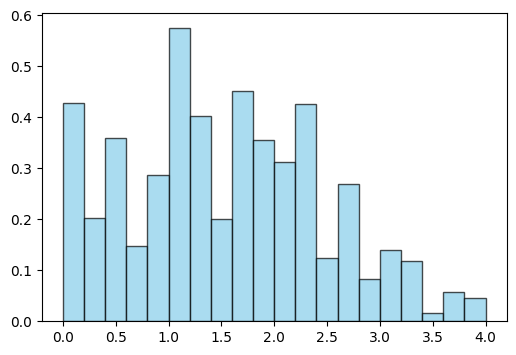

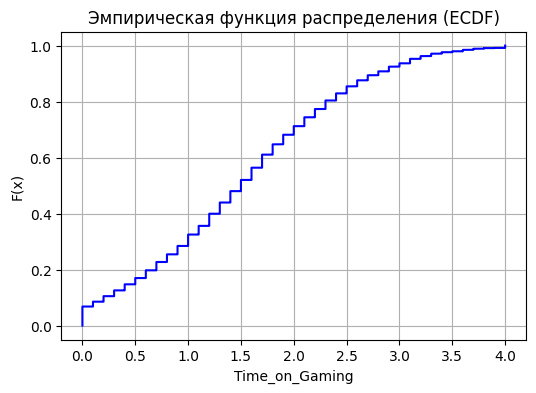

In [112]:
mean = data.mean()
var = data.var()
mode = data.mode()[0]
median = data.median()
q25, q50, q75 = data.quantile([0.25, 0.5, 0.75])
iqr = q75 - q25
skew = stats.skew(data)
kurt = stats.kurtosis(data)

print("Среднее:", mean)
print("Дисперсия:", var)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили 0.25,0.5,0.75:", q25, q50, q75)
print("Интерквартильный размах (IQR):", iqr)
print("Асимметрия:", skew)
print("Эксцесс:", kurt)

plt.figure(figsize=(6,4))
plt.hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')

plt.figure(figsize=(6,4))
sorted_data = np.sort(data)
yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
plt.step(sorted_data, yvals, where='post', color='blue')
plt.title("Эмпирическая функция распределения (ECDF)")
plt.xlabel("Time_on_Gaming")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()

Данные имеют небольшую положительную ассиметрию и отрицательный эксцесс, есть мода в точке 0.0. При этом среднее и медиана почти совпадают.

Chi2 = 2356.4745024988865
df = 51
p-value = 0.0
z_skew = 5.788761731318732 z_kurt = -5.58319043742131


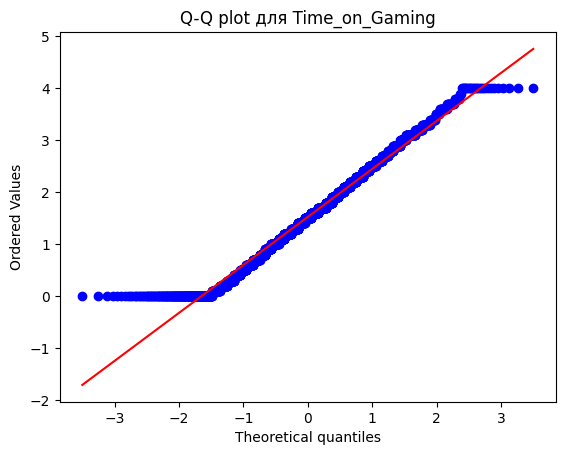

In [113]:

k = int(np.sqrt(n))  
counts, bin_edges = np.histogram(data, bins=k)
expected = n * np.diff(stats.norm.cdf(bin_edges, loc=mean, scale=data.std()))
chi2 = ((counts - expected) ** 2 / expected).sum()
df_chi2 = k - 1 - 2
p_value = 1 - stats.chi2.cdf(chi2, df_chi2)

print("Chi2 =", chi2)
print("df =", df_chi2)
print("p-value =", p_value)

se_skew = np.sqrt(6/n)
se_kurt = np.sqrt(24/n)
print("z_skew =", skew/se_skew, "z_kurt =", kurt/se_kurt)


stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot для Time_on_Gaming")
plt.show()


По χ² распределение не нормально.
Асимметрия больше 0, то есть скошено вправо. Эксцесс отрицателен, распределение более плоское чем нормальное.


--- Стандартизация ---
Среднее: 3.7125857943465233e-16
Дисперсия: 1.0
Мода: -1.6353218242469598
Медиана: -0.02708977540056775
Квантили 0.25,0.5,0.75: -0.7775980648622173 -0.02708977540056775 0.723418514061082
IQR: 1.5010165789232994
Асимметрия: 0.25888129473555976
Эксцесс: -0.49937573397603474


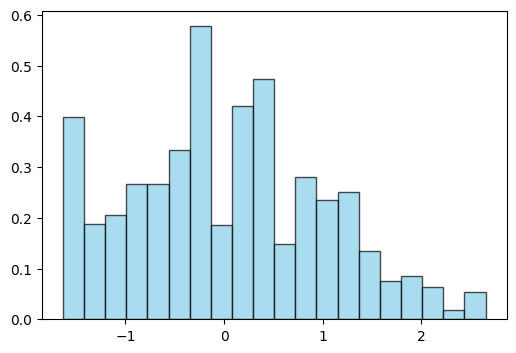

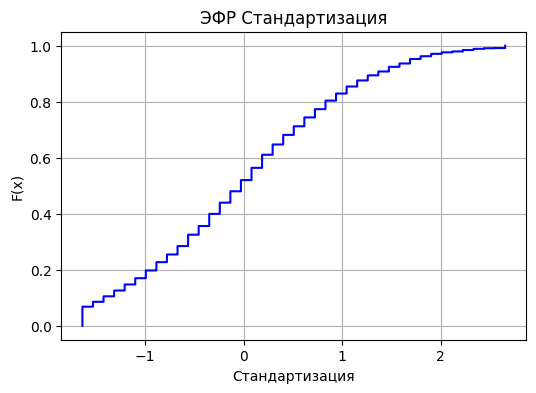

Chi2 = 2352.3749586104464
df = 51
p-value = 0.0
z_skew = 5.788761731318701 z_kurt = -5.583190437421325


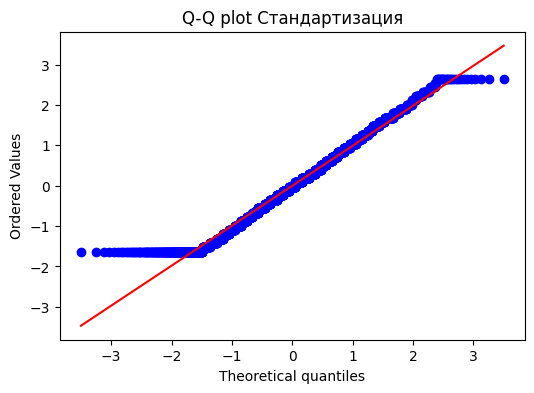


--- Усечение ---
Среднее: 1.5050666666666666
Дисперсия: 0.7934121329332
Мода: 0.0
Медиана: 1.5
Квантили 0.25,0.5,0.75: 0.8 1.5 2.2
IQR: 1.4000000000000001
Асимметрия: 0.05621529711691034
Эксцесс: -0.8912837375919702


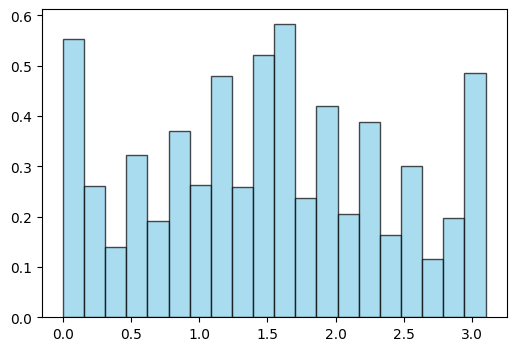

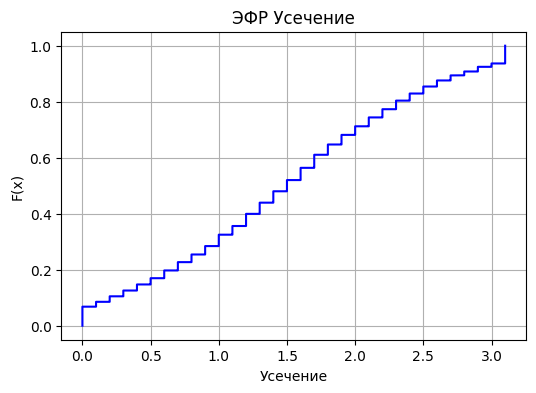

Chi2 = 5524.285345171542
df = 51
p-value = 0.0
z_skew = 1.2570122572875946 z_kurt = -9.964855122478651


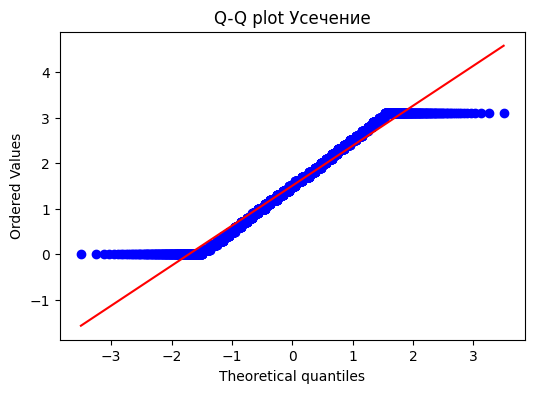


--- Логарифмирование ---
Среднее: 0.8456283168311771
Дисперсия: 0.15879185884205052
Мода: 0.0
Медиана: 0.9162907318741551
Квантили 0.25,0.5,0.75: 0.5877866649021191 0.9162907318741551 1.1631508098056809
IQR: 0.5753641449035618
Асимметрия: -0.6067985606150929
Эксцесс: -0.4803661018975447


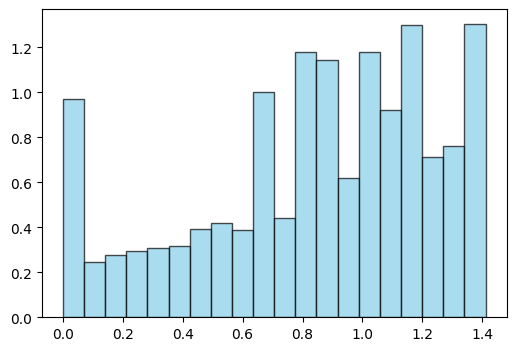

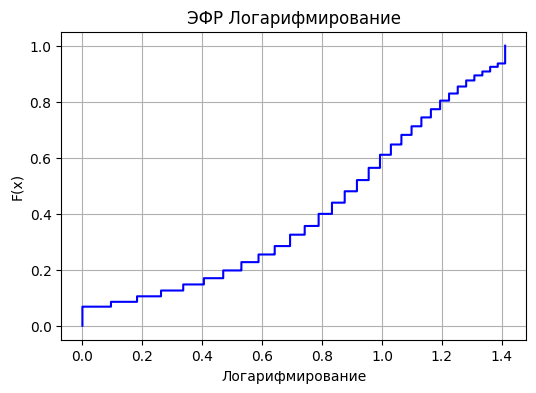

Chi2 = 7458.971226200758
df = 51
p-value = 0.0
z_skew = -13.568428301843742 z_kurt = -5.370656289647504


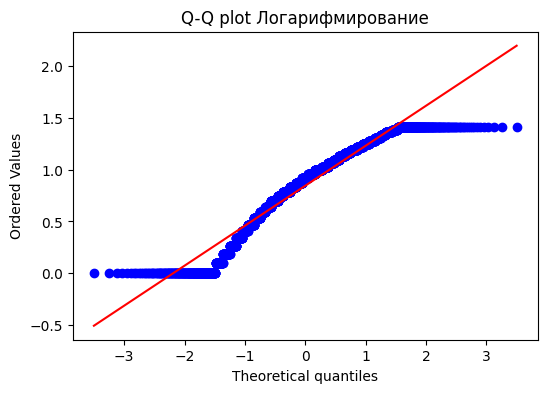

In [116]:

def describe_and_test(sample, title):
    mean = np.mean(sample)
    var = np.var(sample, ddof=1)
    mode = stats.mode(sample, keepdims=True)[0][0]
    median = np.median(sample)
    q25, q50, q75 = np.quantile(sample, [0.25, 0.5, 0.75])
    iqr = q75 - q25
    skew = stats.skew(sample)
    kurt = stats.kurtosis(sample)
    
    print(f"\n--- {title} ---")
    print("Среднее:", mean)
    print("Дисперсия:", var)
    print("Мода:", mode)
    print("Медиана:", median)
    print("Квантили 0.25,0.5,0.75:", q25, q50, q75)
    print("IQR:", iqr)
    print("Асимметрия:", skew)
    print("Эксцесс:", kurt)
    
    plt.figure(figsize=(6,4))
    counts, bins, _ = plt.hist(sample, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    plt.figure(figsize=(6,4))
    sorted_sample = np.sort(sample)
    yvals = np.arange(1, len(sorted_sample)+1) / len(sorted_sample)
    plt.step(sorted_sample, yvals, where='post', color='blue')
    plt.title(f"ЭФР {title}")
    plt.xlabel(title)
    plt.ylabel("F(x)")
    plt.grid(True)
    plt.show()
    
    k = int(np.sqrt(n)) 
    counts, bin_edges = np.histogram(sample, bins=k)
    expected = n * np.diff(stats.norm.cdf(bin_edges, loc=mean, scale=sample.std()))
    chi2 = ((counts - expected) ** 2 / expected).sum()
    df_chi2 = k - 1 - 2
    p_value = 1 - stats.chi2.cdf(chi2, df_chi2)
    
    print("Chi2 =", chi2)
    print("df =", df_chi2)
    print("p-value =", p_value)
    
    se_skew = np.sqrt(6/n)
    se_kurt = np.sqrt(24/n)
    print("z_skew =", skew/se_skew, "z_kurt =", kurt/se_kurt)

    
    plt.figure(figsize=(6,4))
    stats.probplot(sample, dist="norm", plot=plt)
    plt.title(f"Q-Q plot {title}")
    plt.show()

from scipy.stats import truncnorm

mu, sigma = data.mean(), data.std()

standardized = (data - np.mean(data)) / np.std(data, ddof=1)
describe_and_test(standardized, "Стандартизация")

from scipy.stats.mstats import winsorize

trunc_data = winsorize(data, limits=[0.05, 0.05])
describe_and_test(trunc_data, "Усечение")


log_data = np.log1p(trunc_data)  
describe_and_test(log_data, "Логарифмирование")





Винсоризация не дала почти никаких изменений

После логарифмирования распределение стало скошено влево

После стандартизации эксцесс и асимметрия не изменились 

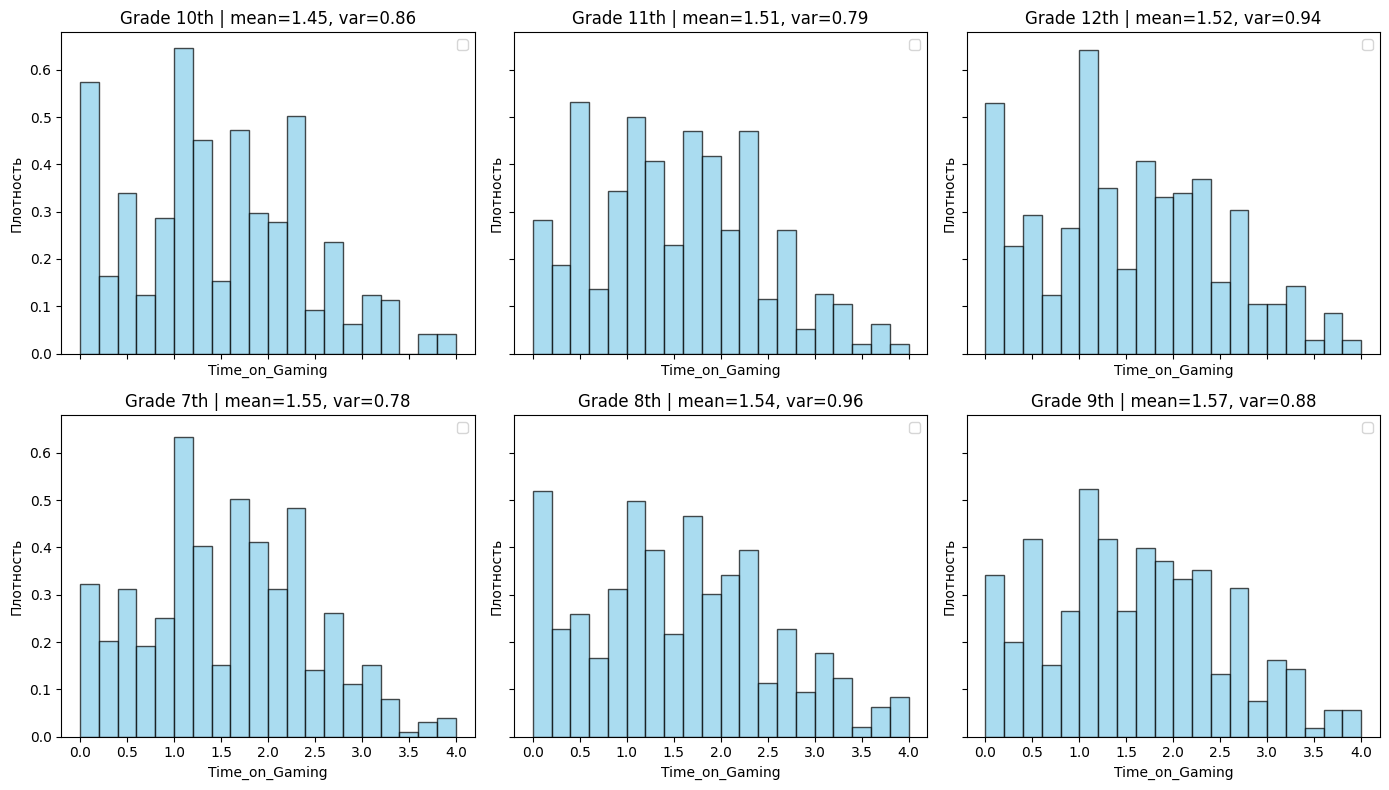

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

grades = df["School_Grade"].unique()
grades = sorted(grades)

nrows, ncols = 2, 3  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,8), sharex=True, sharey=True)
axes = axes.flatten()

for i, grade in enumerate(grades):
    subset = df[df["School_Grade"] == grade]["Time_on_Gaming"].dropna()
    
    mean_val = subset.mean()
    var_val = subset.var(ddof=1)
    
    counts, bins, _ = axes[i].hist(subset, bins=20, density=True, alpha=0.7,
                                   color='skyblue', edgecolor='black')
    
    axes[i].set_title(f"Grade {grade} | mean={mean_val:.2f}, var={var_val:.2f}")
    axes[i].set_xlabel("Time_on_Gaming")
    axes[i].set_ylabel("Плотность")
    axes[i].legend()

plt.tight_layout()
plt.show()


Средние значения Time_on_Gaming по группам различаются, но не очень сильно. Дисперсии также сопоставимы.